<a href="https://colab.research.google.com/github/KWeatherwalks/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module4-make-explanatory-visualizations/LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# Make Explanatory Visualizations

### Objectives

- Student can identify the appropriate visualization type for a particular variable type and research question 
- Student can use Matplotlib to visualize distributions and relationships with continuous and discrete variables
- Student can add emphasis and annotations to transform visualizations from exploratory to explanatory
- Student can remove clutter from visualizations
- Student can identify misleading visualizations and how to fix them



Import the Titanic dataset and print the first 5 rows.

In [1]:
import pandas as pd

# Load the Titanic dataset from its URL:
Titanic = pd.read_csv('https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Titanic/Titanic.csv')

Titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses_Aboard,Parents/Children_Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [2]:
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

In [3]:
# Finding maximum fare paid to determine the range for the plot
Titanic['Fare'].max()

512.3292

###1) What are the appropriate visualizations to answer the question "What was the typical fare paid for passage on the Titanic?"



>**Boxplots and histograms are appropriate visualizations to determine the typical fare paid for passage on the Titanic.**

###2) Create the visualizations you selected in 2).  

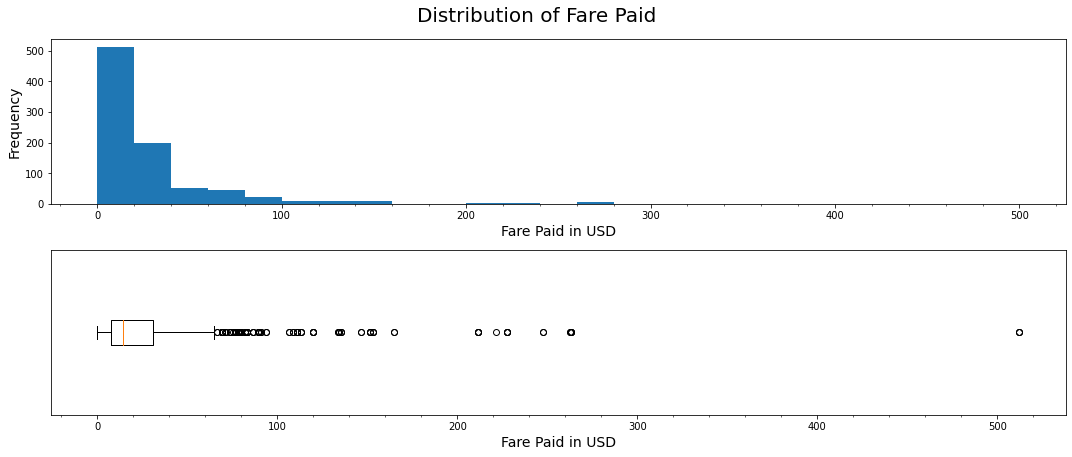

In [4]:
# New figure and axis handles
fig, ax = plt.subplots(nrows=2, figsize=(15,6))
fig.set_facecolor('white')

# Title
fig.suptitle('Distribution of Fare Paid', fontsize=20, y=1.05)

# First Plot
ax[0].hist(Titanic['Fare'], bins=range(0,520,20))
ax[0].xaxis.set_minor_locator(AutoMinorLocator())
ax[0].set_xlabel('Fare Paid in USD', fontsize=14)
ax[0].set_ylabel('Frequency', fontsize=14)

# Second Plot
ax[1].boxplot(Titanic['Fare'], vert=False)
ax[1].xaxis.set_minor_locator(AutoMinorLocator())
ax[1].yaxis.set_visible(False)
ax[1].set_xlabel('Fare Paid in USD', fontsize=14)

# Adjust spacing between first and second plot
plt.tight_layout()

plt.show()

###3) Describe your results in a sentence or two.

>Fare paid by passengers on the Titanic is unimodal and right-skewed with many high outliers.  
The typical fare paid was between 0 and 20 dollars.


###4) Plot a histogram of fare paid by Titanic passengers by sex to see if there was a difference in fare paid between male and female passengers.  

In [5]:
# Subset by sex
Titanic_male = Titanic[Titanic['Sex']=='male']
Titanic_female = Titanic[Titanic['Sex']=='female']

**Side by side comparison**

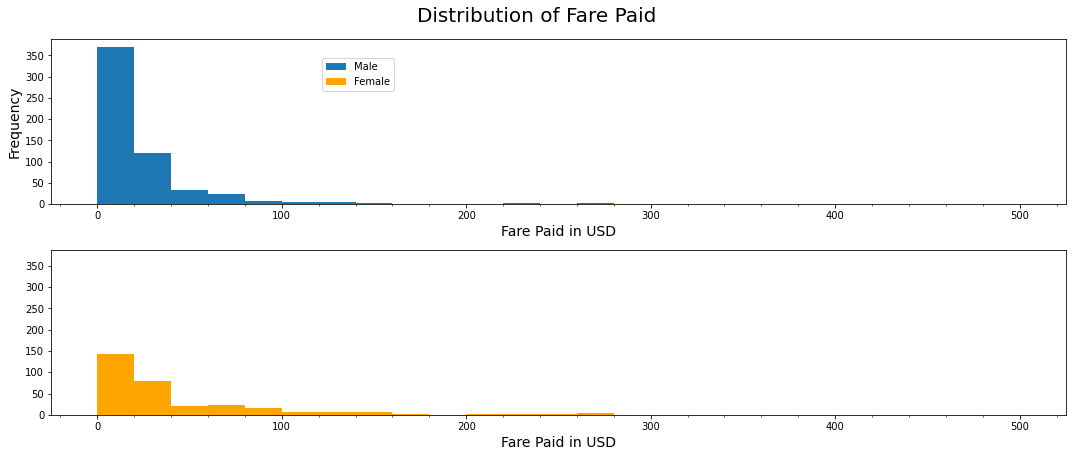

In [6]:
# New figure and axis handles
fig, ax = plt.subplots(nrows=2, figsize=(15,6), sharey=True)
fig.set_facecolor('white')

# Title
fig.suptitle('Distribution of Fare Paid', fontsize=20, y=1.05)

# Males
ax[0].hist(Titanic_male['Fare'], bins=range(0,520,20), label='Male')
ax[0].xaxis.set_minor_locator(AutoMinorLocator())
ax[0].set_xlabel('Fare Paid in USD', fontsize=14)
ax[0].set_ylabel('Frequency', fontsize=14)


# Females
ax[1].hist(Titanic_female['Fare'], bins=range(0,520,20), label='Female',
           color='orange')
ax[1].xaxis.set_minor_locator(AutoMinorLocator())
ax[1].set_xlabel('Fare Paid in USD', fontsize=14)
ax[0].set_ylabel('Frequency', fontsize=14)

# Legend
fig.legend(loc=[0.3,0.8])

# Adjust spacing between plots
plt.tight_layout()

plt.show()

**Overlapping**

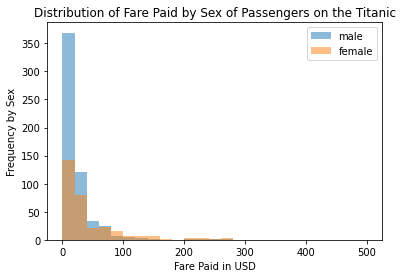

In [7]:
# New figure handle
fig = plt.figure()
fig.set_facecolor('white')

# Plots
plt.hist(Titanic_male['Fare'], range(0,520,20), label='male', alpha=0.5)
plt.hist(Titanic_female['Fare'], range(0,520,20), label='female', alpha=0.5)

# Labels
plt.title('Distribution of Fare Paid by Sex of Passengers on the Titanic')
plt.xlabel('Fare Paid in USD')
plt.ylabel('Frequency by Sex')

# Legend
plt.legend(loc='upper right')

plt.show()

**Normalized distributions**

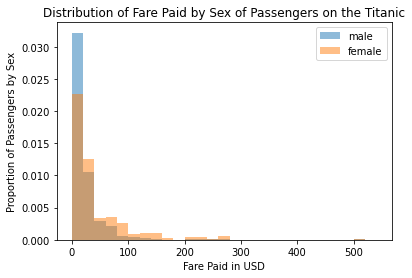

In [8]:
# New figure handle
fig = plt.figure()
fig.set_facecolor('white')

# Plots
plt.hist(Titanic_male['Fare'], range(0,551,20), label='male', alpha=0.5, density=True)
plt.hist(Titanic_female['Fare'], range(0,551,20), label='female', alpha=0.5, density=True)

# Labels
plt.title('Distribution of Fare Paid by Sex of Passengers on the Titanic')
plt.xlabel('Fare Paid in USD')
plt.ylabel('Proportion of Passengers by Sex')

# Legend
plt.legend(loc='upper right')

plt.show()

###5) Describe the difference in distribution of fare paid between male and female passengers.

>Both distributions are highly skewed to the right. More males paid the lowest fares than females while some females paid higher fares than males.

###6) Make a bar plot to show the frequency of individuals in each passenger class.

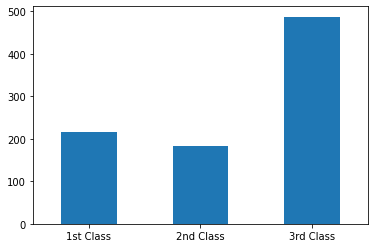

In [9]:
# New figure handle
fig = plt.figure()
fig.set_facecolor('white')

# Plot
Titanic['Pclass'].value_counts().sort_index().plot.bar(rot=0)

# Labels
plt.xticks(range(3), labels=['1st Class', '2nd Class', '3rd Class'])

plt.show()

###7) Summarize your results from 6)

>Third class passengers were by far the most represented on the Titanic.

###8) Create a graphical summary for the number of parents/ children on board for each passenger.

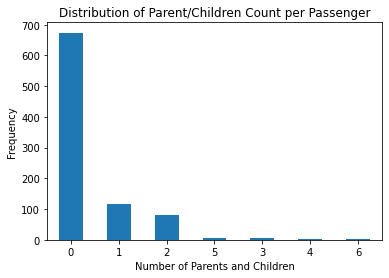

In [11]:
# New figure handle
fig = plt.figure()
fig.set_facecolor('white')

# Plot
Titanic['Parents/Children_Aboard'].value_counts().plot.bar(rot=0)

# Labels
plt.title('Distribution of Parent/Children Count per Passenger')
plt.xlabel('Number of Parents and Children')
plt.ylabel('Frequency')

plt.show()

###9) Summarize your results from 8).  Did most individuals travel alone or with family?

>Lone travelers were overwhelmingly the most represented on the Titanic.

###In 10) - 14)  We will use figure, axes syntax to plot passenger survival by whether the passenger was a child or an adult. 

###10) Create a variable to categorize the passenger as a child (under age 18) or adult (18 years or older).

In [12]:
# Create new column for Age_Group category
Titanic['Age_Group'] = Titanic['Age'].apply(lambda x: "Child" if x<18 else "Adult")

In [13]:
# Sanity Check
Titanic['Age_Group'].value_counts()

Adult    757
Child    130
Name: Age_Group, dtype: int64

###11) Make a cross-tab of survival by age (child vs adult).

In [14]:
pd.crosstab(Titanic['Age_Group'], columns='count')

col_0,count
Age_Group,
Adult,757
Child,130


###12) Create a new data frame to hold the data for the figure.

In [15]:
# Alternative to manually creating the dataframe
df = pd.crosstab(Titanic['Age_Group'], columns='count').reset_index()

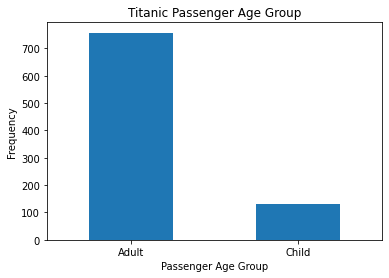

In [16]:
# Bar plot
ax = df.plot.bar(x='Age_Group', y='count',rot=0)
# Remove nonhelpful legend
ax.get_legend().remove()

# Labels
ax.set_xlabel('Passenger Age Group')
ax.set_ylabel('Frequency')
ax.set_title('Titanic Passenger Age Group')

plt.show()

###13) Adapt the plot from the Guided Project to show the relationship between passenger age (child vs adult) and survival.

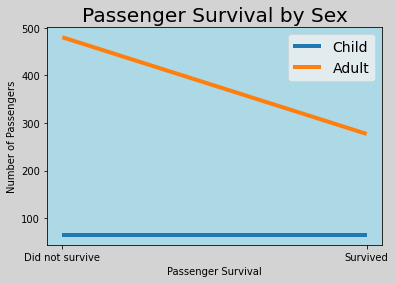

In [17]:
fig, ax = plt.subplots() 

plt.style.use('fivethirtyeight')

# everything is done to either our "fig", or "ax" variables

#You could change this if you wanted to...
fig.set_facecolor('lightgray')


my_xticks = ['Did not survive','Survived']
Titanic_child = Titanic[Titanic['Age_Group']=='Child']
Titanic_adult = Titanic[Titanic['Age_Group']=='Adult']

ax.plot(my_xticks, Titanic_child['Survived'].value_counts().sort_index(), label='Child')
ax.plot(my_xticks, Titanic_adult['Survived'].value_counts().sort_index(), label='Adult')


ax.set_facecolor('lightblue')


ax.set_title("Passenger Survival by Sex")
ax.set_xlabel('Passenger Survival')
ax.set_ylabel('Number of Passengers')

ax.legend()
plt.show()

###14) Summarize your results about passenger survival by age.

>Roughly the same number of children survived as those that died, but fewer adults survived than not.



#Project Milestone

Take some time to explore the links below.  Think about how we use graphics to answer research questions and how looking at visualizations can help us develop new lines of enquiry.  

By the end of the weekend, you should have a pretty good idea (though it can change!) what kind of data and visualizations you'd like to include in your Portfolio Project.

### Links

- [How to Spot Visualization Lies](https://flowingdata.com/2017/02/09/how-to-spot-visualization-lies/)
- [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary)
- [Choosing a Python Visualization Tool flowchart](http://pbpython.com/python-vis-flowchart.html)
- [Searborn example gallery](http://seaborn.pydata.org/examples/index.html) & [tutorial](http://seaborn.pydata.org/tutorial.html)
- [Strong Titles Are The Biggest Bang for Your Buck](http://stephanieevergreen.com/strong-titles/)
- [Remove to improve (the data-ink ratio)](https://www.darkhorseanalytics.com/blog/data-looks-better-naked)
- [How to Generate FiveThirtyEight Graphs in Python](https://www.dataquest.io/blog/making-538-plots/)